In [53]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
(x_train , y_train) , (x_test , y_test) = load_data()

In [56]:
print(x_train.shape , x_test.shape)   # 3d image data , i need to convert this into 2d data for processing

(60000, 28, 28) (10000, 28, 28)


In [57]:
print(y_train.shape , y_test.shape)   # target variable

(60000,) (10000,)


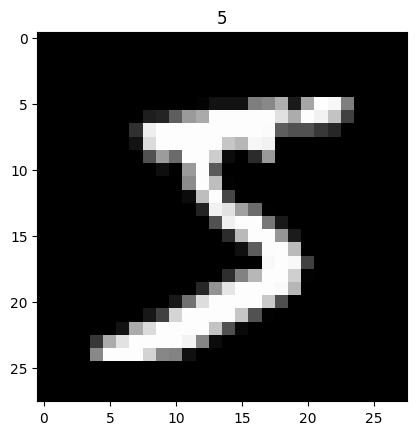

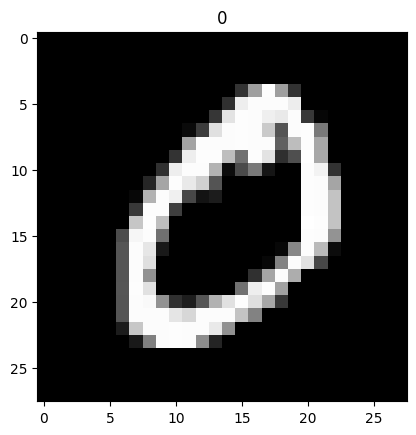

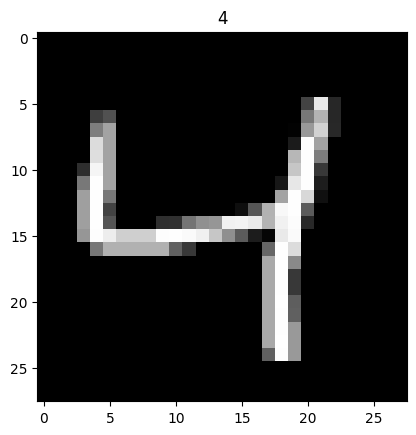

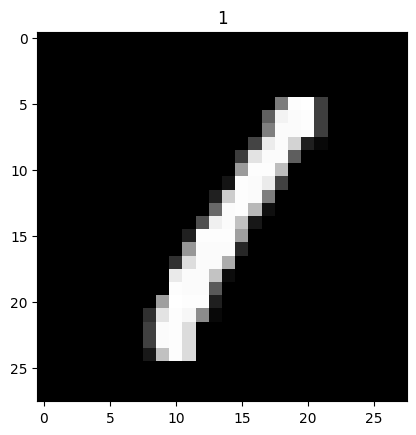

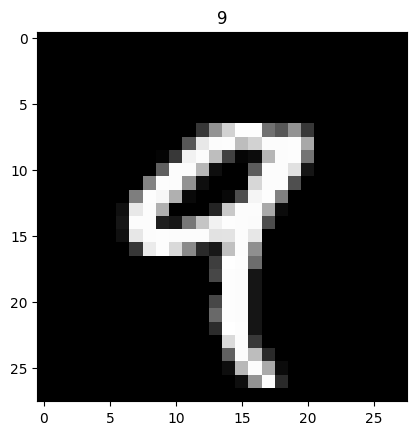

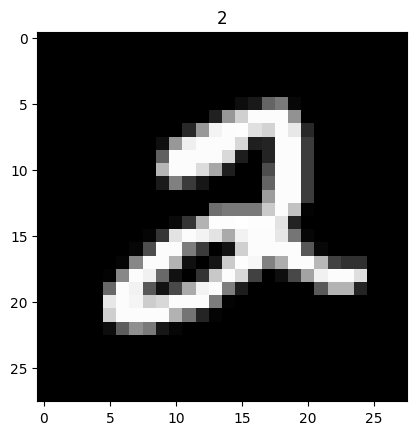

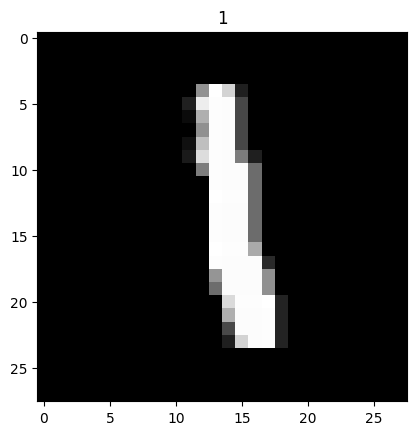

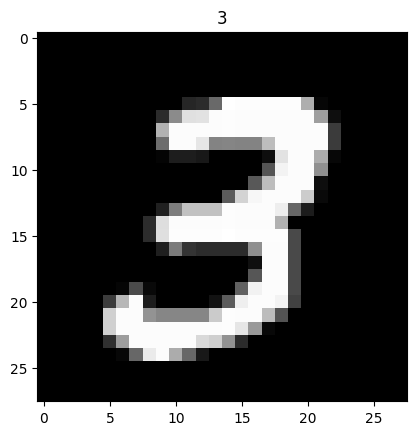

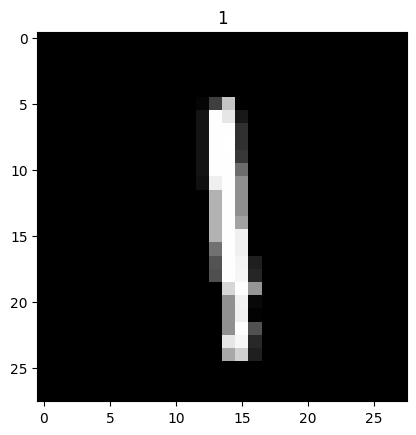

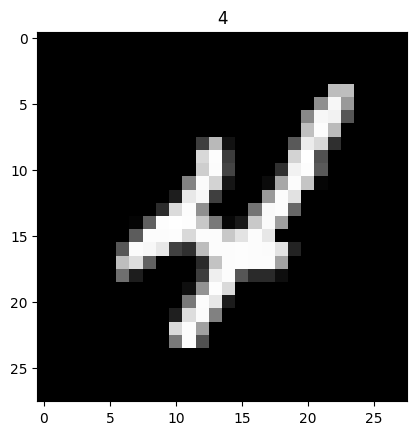

In [58]:
for i in range(10):
  plt.imshow(x_train[i] , cmap = 'gray')
  plt.title(str(y_train[i]))
  plt.show()

In [59]:
x_train = x_train.reshape(60000,784)/255      # converted the data into 2d array since our target column has 2d array
x_test = x_test.reshape(10000 , 784)/255      # we are deviding by 255 for normalizing the data ser

In [60]:
y_train_ohe = to_categorical(y_train)    # one hot encoding like function which turn the data into integer categories
y_test_ohe = to_categorical(y_test)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


now that our dataser has been prepared let us start with model initialization


# Tensorflow model


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam , Adadelta, SGD
from tensorflow.keras.regularizers import L1L2

#Model building

In [63]:
model = Sequential()
model.add(Input(784))   # input data
model.add(Dense(100 , activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 10 , activation = 'softmax'))   #output

# Compilation

In [64]:
model.compile(optimizer = Adam(learning_rate = 0.001) , loss = 'categorical_crossentropy' , metrics = 'accuracy')

In [65]:
model.fit(x = x_train , y = y_train_ohe ,epochs = 60 , validation_data = (x_test , y_test_ohe),batch_size = 2000)

Epoch 1/60
30/30 [==============================] - 2s 42ms/step - loss: 1.2388 - accuracy: 0.6658 - val_loss: 0.5431 - val_accuracy: 0.8647
Epoch 2/60
30/30 [==============================] - 1s 30ms/step - loss: 0.4691 - accuracy: 0.8685 - val_loss: 0.3463 - val_accuracy: 0.9079
Epoch 3/60
30/30 [==============================] - 1s 31ms/step - loss: 0.3560 - accuracy: 0.8988 - val_loss: 0.2908 - val_accuracy: 0.9198
Epoch 4/60
30/30 [==============================] - 1s 28ms/step - loss: 0.3058 - accuracy: 0.9138 - val_loss: 0.2582 - val_accuracy: 0.9270
Epoch 5/60
30/30 [==============================] - 1s 31ms/step - loss: 0.2728 - accuracy: 0.9228 - val_loss: 0.2336 - val_accuracy: 0.9328
Epoch 6/60
30/30 [==============================] - 1s 31ms/step - loss: 0.2467 - accuracy: 0.9308 - val_loss: 0.2155 - val_accuracy: 0.9369
Epoch 7/60
30/30 [==============================] - 1s 34ms/step - loss: 0.2264 - accuracy: 0.9362 - val_loss: 0.1994 - val_accuracy: 0.9439
Epoch 8/60
30

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
history = model.history.history
val_loss = history['loss']
val_accuracy = history['accuracy']
train_loss = history['val_loss']
train_acc = history['val_accuracy']

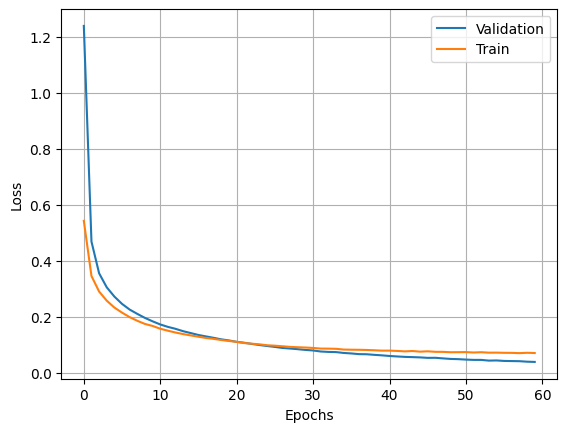

In [69]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation' , 'Train'])
plt.grid()
plt.show()

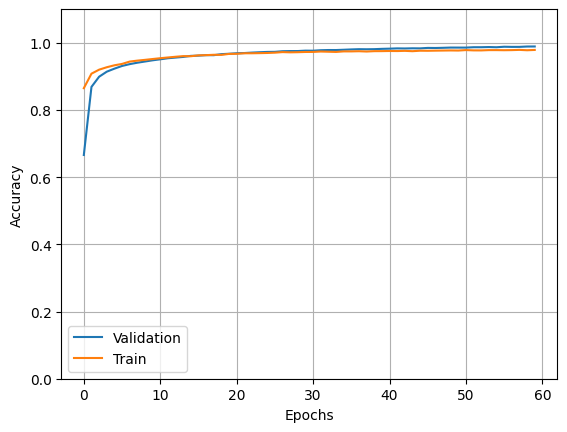

In [70]:
plt.plot(val_accuracy)
plt.plot(train_acc)
plt.ylim(0,1.1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

In [71]:
import numpy as np

# Prediction

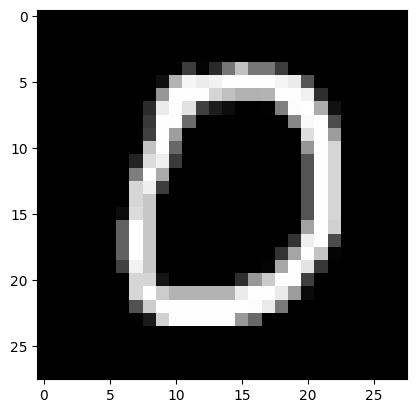

In [72]:
plt.imshow(x_test.reshape(10000, 28, 28)[10], cmap="gray")
plt.show()

In [73]:
preds = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [74]:
print(f"Class = {np.argmax(preds[10])} | Probability = {preds[10][np.argmax(preds[10])]}")

Class = 0 | Probability = 0.9999428391456604
